In [1]:
% run 0-utils.ipynb

In [2]:
plt.rcParams['figure.figsize'] = 18, 5

In [3]:
from gcnn.datasets import load_icebergs
from gcnn.viz import plot_bands, plot_bands_3d

In [4]:
icebergs = load_icebergs('train')

In [5]:
size = 75

In [6]:
icebergs.dtypes

band_1         object
band_2         object
inc_angle     float64
is_iceberg      int64
dtype: object

In [7]:
icebergs.shape

(1604, 4)

In [8]:
icebergs.is_iceberg.value_counts()

0    851
1    753
Name: is_iceberg, dtype: int64

In [9]:
np.count_nonzero(icebergs.is_iceberg) / icebergs.shape[0]

0.4694513715710723

In [10]:
np.count_nonzero(icebergs.inc_angle.isnull()) / icebergs.shape[0]

0.08291770573566085

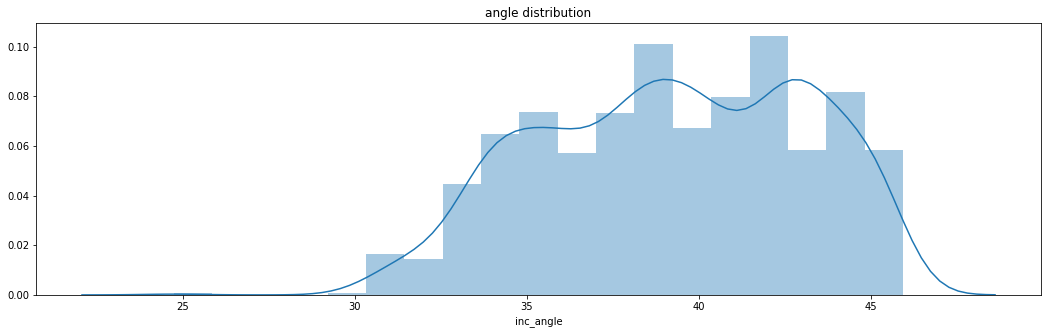

In [11]:
sns.distplot(icebergs.inc_angle.dropna())
plt.title("angle distribution");

In [12]:
def bandshow(e,title):
    plt.imshow(np.c_[e.band_1.reshape(size, size), e.band_2.reshape(size, size)])
    plt.title(str(title))

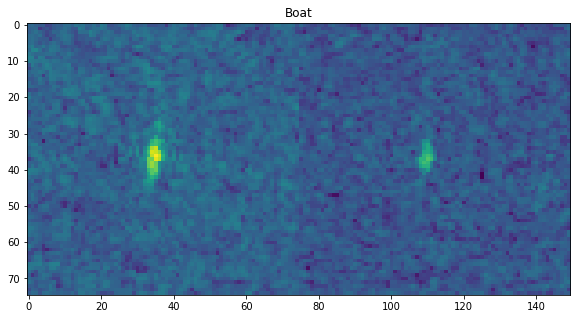

In [13]:
bandshow(e = icebergs.iloc[0],title = "Boat")

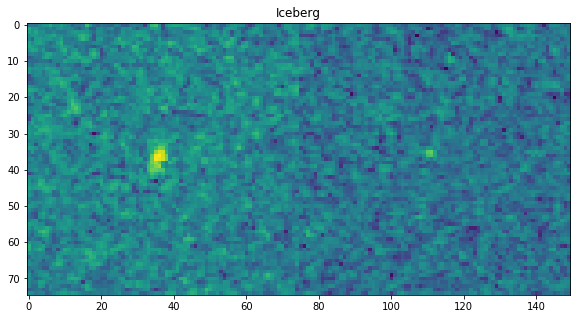

In [14]:
bandshow(e = icebergs.iloc[2],title = "Iceberg")

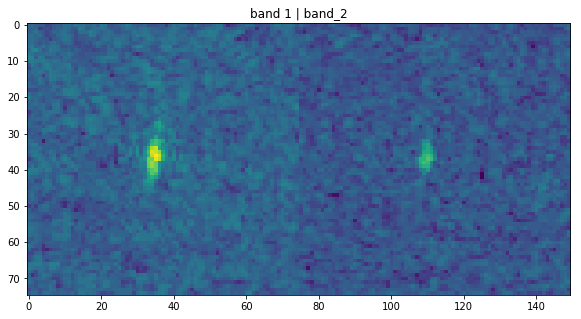

In [15]:
plot_bands(icebergs.iloc[0])

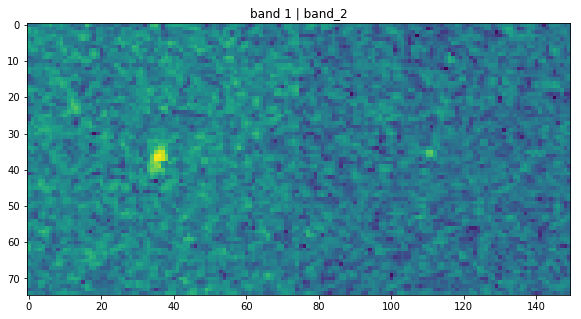

In [16]:
plot_bands(icebergs.iloc[2])

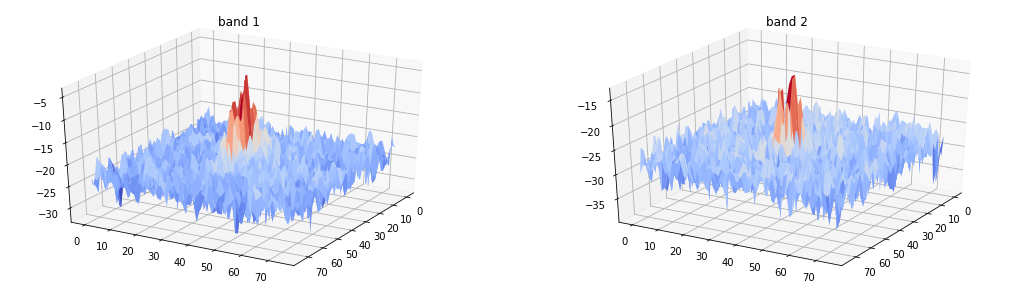

In [17]:
plot_bands_3d(icebergs.iloc[10])

In [18]:
ice = icebergs[icebergs.is_iceberg == 1].sample(1).iloc[0]
noice = icebergs[icebergs.is_iceberg == 0].sample(1).iloc[0]

In [19]:
def plot_bands(df,title): 
    g = sns.distplot(df.band_1,hist_kws={"label":"band1"})
    g = sns.distplot(df.band_2,hist_kws={"label":"band2"},ax=g)
    title = "band 1 and band 2 distribution for " + str(title)
    g.axes.set_title(title);
    g.legend();

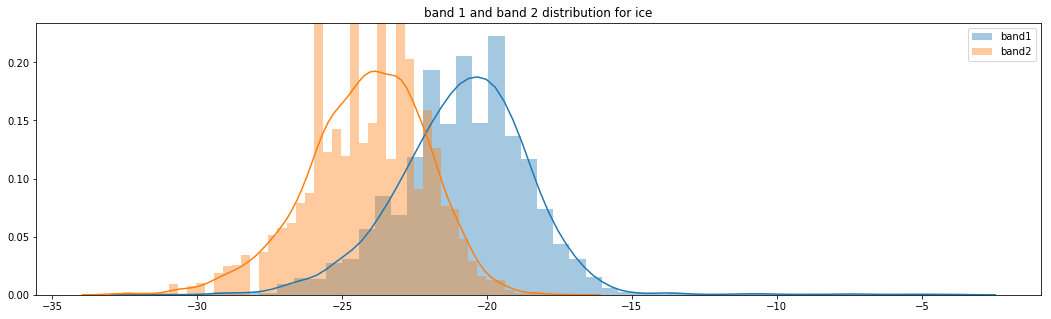

In [20]:
plot_bands(ice,"ice")

In [21]:
ice.band_1.shape

(5625,)

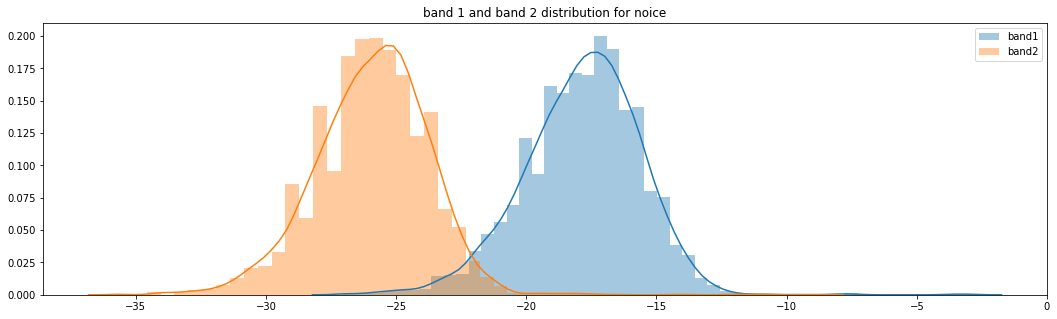

In [22]:
plot_bands(noice,"noice")

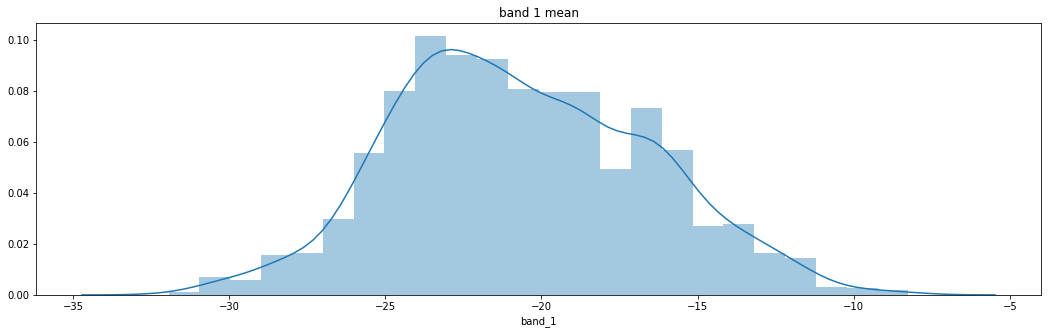

In [23]:
g = sns.distplot(icebergs.band_1.apply(np.mean))
g.axes.set_title("band 1 mean");

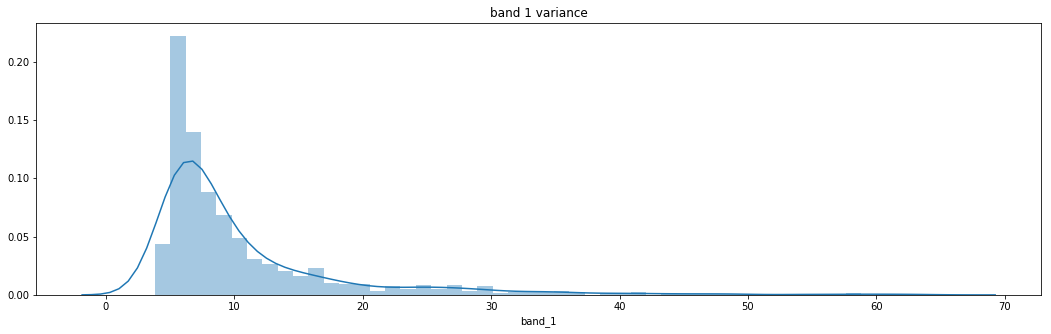

In [24]:
sns.distplot(icebergs.band_1.apply(np.var))
plt.title("band 1 variance");

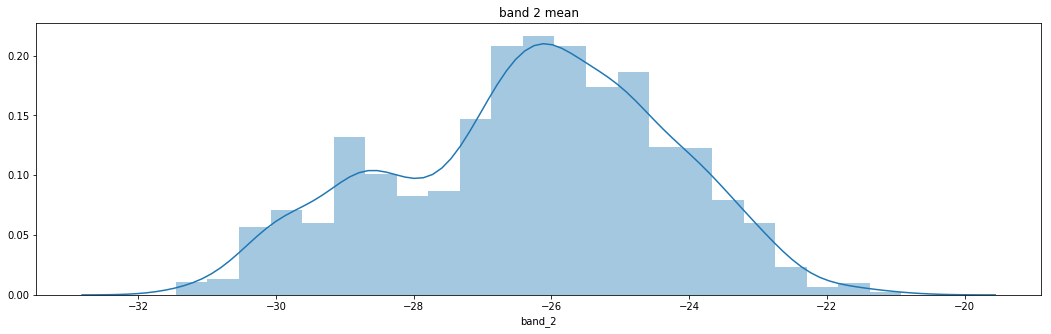

In [25]:
sns.distplot(icebergs.band_2.apply(np.mean))
plt.title("band 2 mean");

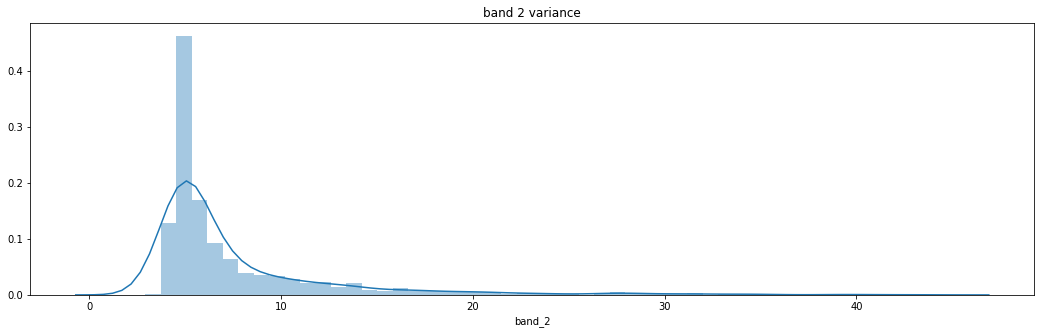

In [26]:
sns.distplot(icebergs.band_2.apply(np.var))
plt.title("band 2 variance");

In [27]:
i = icebergs.is_iceberg == 1

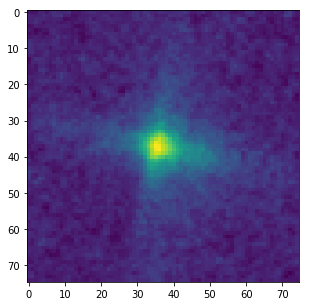

In [28]:
plt.imshow(np.stack(icebergs.band_1 - icebergs.band_2)[~i].mean(axis=0).reshape(75, 75));

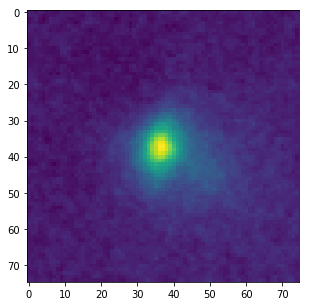

In [29]:
plt.imshow(np.stack(icebergs.band_1 - icebergs.band_2)[i].mean(axis=0).reshape(75, 75));

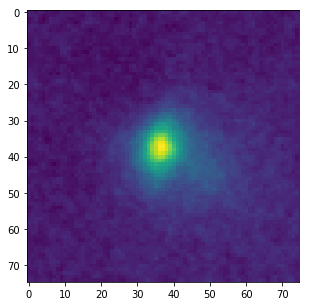

In [30]:
plt.imshow(np.stack((icebergs.band_1 - icebergs.band_2) / 2)[i].mean(axis=0).reshape(75, 75));

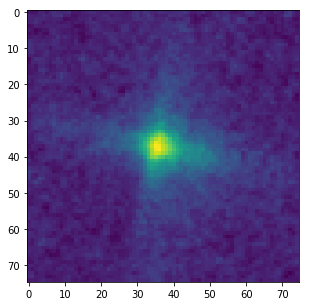

In [31]:
plt.imshow(np.stack((icebergs.band_1 - icebergs.band_2) / 2)[~i].mean(axis=0).reshape(75, 75));